# 선형 회귀 실습
## 최소 제곱법 (method of least squares)

In [1]:
import numpy as np

# x값과 y값
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

# x & y mean
mx = np.mean(x)
my = np.mean(y)
print(f'mean : {mx}, {my}')

# 기울기 공식 분모 & 분자
divisor = sum([(mx - i)**2 for i in x])

def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx)*(y[i] - my)
    return d

dividend = top(x, mx, y, my)
print(f'분모 : {divisor}, 분자 : {dividend}')

# 기울기 & bias
a = dividend/divisor
b = my - (mx*a)

print(f'기울기 : {a}, y절편 : {b}')

mean : 5.0, 90.5
분모 : 20.0, 분자 : 46.0
기울기 : 2.3, y절편 : 79.0


## 평균 제곱 오차 (MSE, mean squared error)

In [2]:
import numpy as np

# 기울기와 y절편
fake_a_b = [3, 76]

data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b
def predict(x):
    return fake_a_b[0]*x + fake_a_b[1]

# MSE 함수
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

# MSE 함수를 각 y값에 대입해 최종 값을 구하는 함수
def mse_val(predict_result, y):
    return mse(np.array(predict_result), np.array(y))
    
# predict_result
predict_result = []

# x값 대입
for i in range(len(x)):
    # predict_result 생성
    predict_result.append(predict(x[i]))
    print(f'공부한 시간 : {x[i]}, 실제 점수 : {y[i]}, 예측 점수: {predict(x[i])}')

# result MSE
print('MSE 최종값 : '+ str(mse_val(predict_result, y)))

공부한 시간 : 2, 실제 점수 : 81, 예측 점수: 82
공부한 시간 : 4, 실제 점수 : 93, 예측 점수: 88
공부한 시간 : 6, 실제 점수 : 91, 예측 점수: 94
공부한 시간 : 8, 실제 점수 : 97, 예측 점수: 100
MSE 최종값 : 11.0


## 경사 하강법

epoch = 0, 기울기 = 0.928, 절편 = 0.181
epoch = 600, 기울기 = 12.844471191318743, 절편 = 16.075105483828832
epoch = 1200, 기울기 = 10.97984864787588, 절편 = 27.202375380039047
epoch = 1800, 기울기 = 9.444955036916404, 절편 = 36.36196402234923
epoch = 2400, 기울기 = 8.181483024712653, 절편 = 43.90182464215073
epoch = 3000, 기울기 = 7.141436005020983, 절편 = 50.10838045879872
epoch = 3600, 기울기 = 6.285304810406849, 절편 = 55.21740528665834
epoch = 4200, 기울기 = 5.580566843263092, 절편 = 59.42298007931095
epoch = 4800, 기울기 = 5.000450611710807, 절편 = 62.88486565092688
epoch = 5400, 기울기 = 4.5229187377372915, 절편 = 65.73457164876129
epoch = 6000, 기울기 = 4.1298308042201395, 절편 = 68.08035232408912


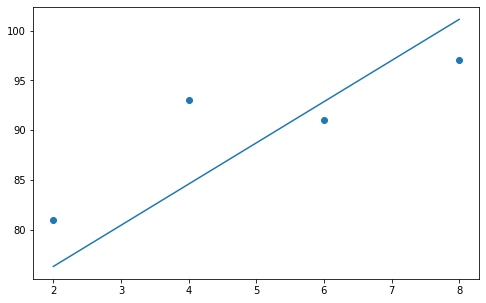

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# graph
plt.figure(figsize=(8, 5))
# plt.scatter(x, y)
# plt.show()

# x & y 넘파이 배열로 변경
x_data = np.array(x)
y_data = np.array(y)

# 기울기 & y절편 초기화
a, b = 0, 0

# learning rate
lr = 0.001

# epochs
epochs = 6001

# 경사하강법
for i in range(epochs):
    y_pred = a*x_data + b
    error = y_data - y_pred

    a_diff = -(2/len(x_data))*sum(x_data*error)
    b_diff = -(2/len(x_data))*sum(error)

    a = a - lr*a_diff
    b = b - lr*b_diff

    if i % 600 == 0:
        print(f'epoch = {i}, 기울기 = {a}, 절편 = {b}')

y_pred = a*x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()